# Qiskit Summer School 2021
## Day 1 Lecture 2


These are my personal notes & interpretations of the lectures done on the first day of the 2021 Qiskit summer school.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram


### Lecture 1.2 

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
\newcommand{\ketbra}[2]{\left|{#1}\middle\rangle\langle{#2}\right|}
$$

### Quantum Circuits

#### Single qubit gates

As quantum theory is _unitary_, all quantum gates are represented by unitary matrices, so that $U^\dagger U = I$, where $I$ is an unitary matrix of size $m \times m$

$$
I \in R^{2\times2} := \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix}
$$

_**Pauli X Gate**_

$$
\sigma_X = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} = \ketbra{0}{1} + \ketbra{1}{0}
$$

This gate applies a rotation around the _x-axis_ by $\pi$. In comparison to classical gates, it is a _bit flip_, ergo a NOT-Gate


_**Pauli Z Gate**_

$$
\sigma_Z = \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix} = \ketbra{0}{0} - \ketbra{1}{1}
$$

This gate applies a rotation around the _z-axis_ by $\pi$, so it's a _phase flip_

_**Pauli Y Gate**_

$$
\sigma_Y = \begin{pmatrix}0 & -i \\ i & 0\end{pmatrix} = i \cdot \sigma_X \cdot \sigma_Z
$$

This gate applies a rotation around the _z-axis_ and _x-axis_, so it's a _bit & phase flip_

_**Hadamard gate**_

$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix} = \frac{1}{\sqrt{2}}(\ketbra{0}{0} + \ketbra{0}{1} + \ketbra{1}{0} - \ketbra{1}{1})
$$

The Hadamard gate creates a superposition. It can also be used to change between $X$ and $Z$ basis, i.e.

$$
H\ket{+} = \ket{0} \\
H\ket{-} = \ket{1}
$$

In a similar fashion, $S \cdot H$ can be used to change from $Z$ to $Y$ basis. $S$ by itself adds $90°$ to the phase $\varphi$:
$$
S = \begin{pmatrix}1 & 0 \\ 0 & i\end{pmatrix} \\
S\ket{+} = \ket{+i} \\
S\ket{-} = \ket{-i}\\
$$


_Sidenote:_

Quantum Gates are, in comparison to the classical gates, _not instantaneous_. We like to idealize as if the gates are instantaneous, but they take some time as the _state_ has to move trough the _Hilbert space_ to reach its new "spot"


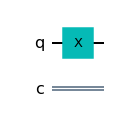

In [9]:

# Previously talked about gates as circuits:
# Pauli X
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.draw('mpl');



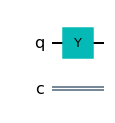

In [15]:
# Pauli y
circuit = QuantumCircuit(1,1)
circuit.y(0)
circuit.draw('mpl');


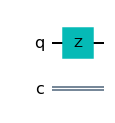

In [14]:
# Pauli z
circuit = QuantumCircuit(1,1)
circuit.z(0)
circuit.draw('mpl');

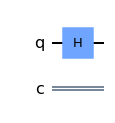

In [13]:
# Hadamard
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.draw('mpl');

#### Multipartite quantum states

To describe multiple states we use _tensor products_:

$$
\ket{a} \otimes \ket{b} = \begin{pmatrix}a_1 \\ a_2\end{pmatrix} \otimes \begin{pmatrix}b_1 \\ b_2\end{pmatrix} = \begin{pmatrix}a_1b_1 \\ a_1b_2 \\ a_2b_1 \\ a_2b_2\end{pmatrix}
$$

As example lets take the two systems $A$ and $B$. System $A$ is in state $\ket{1}_A$ and System $B$ in state $\ket{0}_B$. The bipartite state can be calculated as follows:

$$
\ket{10}_{AB} = \ket{1}_A \otimes \ket{0}_B = \begin{pmatrix}0 \\ 1\end{pmatrix} \otimes \begin{pmatrix}1 \\ 0\end{pmatrix} = \begin{pmatrix}0 \\ 0 \\ 1 \\0 \end{pmatrix}
$$

States in this form are called _uncorrelated_. There also exists states that can not be expressed as $\ket{\psi}_A \otimes \ket{\psi}_B$ which are called _correlated_ and sometimes even _entangled_, which means a _very strong correlation_. Example:

$$
\ket{\psi^{(00)}}_{AB} = \frac{1}{\sqrt{2}}(\ket{00}_{AB} + \ket{11}_{AB}) = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 0 \\ 0 \\1\end{pmatrix}
$$



#### Two qubit gates

One classical example of a two bit gate would be the _XOR_ gate, that takes 2 inputs and gives one output. This process is irreversible as we cannot construct the inputs when we only have the output. As previously noted quantum theory is _unitary_, which means we use _reversible_ gates!

One example of a 2 qubit gate would be the _CNOT_ gate, which stands for _Controller NOT_

$$
CNOT = \begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0  & 0 & 1 \\0 & 0 & 1 & 0\end{pmatrix} \\
\\
CNOT \cdot \ket{00} = CNOT \cdot \begin{pmatrix}1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \ket{00} \\
CNOT \cdot \ket{10} = CNOT \cdot \begin{pmatrix}0 \\ 0 \\ 1 \\ 0\end{pmatrix} = \ket{11} \\
$$

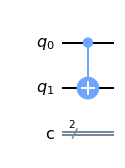

In [12]:
# 2 qubit CNOT example, where qubit 0 is the control qubit
circuit = QuantumCircuit(2,2)
circuit.cx(0,1)
circuit.draw('mpl');

#### Entanglement

As previously stated, a pure state $\ket{\psi}_{AB}$ on system $A,B$ cannot be written as $\ket{\varphi}_A \otimes \ket{\phi}_B$ if it is _entangled_

#### Bell states

There are four _Bell states_ that are maximally entangled. They are also built on an orthonormal basis:

$$
\ket{\psi^{00}} := \frac{1}{\sqrt{2}}(\ket{00}+\ket{11}) \\
\ket{\psi^{01}} := (\ket{01}+\ket{10}) \\
\ket{\psi^{10}} := \frac{1}{\sqrt{2}}(\ket{00}-\ket{11}) \\
\ket{\psi^{11}} := (\ket{01}-\ket{10}) \\
$$

A generalized form of writing these is

$$
\ket{\psi^{ij}} = \left(I \otimes \sigma_X^j \cdot \sigma_Z^i\right)\ket{\psi^{00}}
$$

#### Creation of Bell states


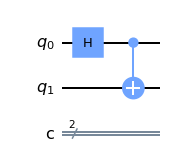

In [11]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.draw('mpl');

The circuit above is all that is needed to create a bell state. It turns the two qubits $\ket{i}_A$ and $\ket{j}_B$ into the bell state $\ket{\psi^{ij}}_{AB}$. The two intial qubits $\ket{i}$ and $\ket{j}$ will be written as $\ket{ij}$ in the calculations below

$$
\ket{00} \rightarrow H_A \rightarrow \frac{\ket{00} + \ket{10}}{\sqrt{2}} \rightarrow CNOT_{AB} \rightarrow \frac{\ket{00}+\ket{11}}{\sqrt{2}} = \ket{\psi^{00}} \\
\ket{01} \rightarrow H_A \rightarrow \frac{\ket{01} + \ket{11}}{\sqrt{2}} \rightarrow CNOT_{AB} \rightarrow \frac{\ket{01}+\ket{10}}{\sqrt{2}} = \ket{\psi^{01}} \\
\ket{10} \rightarrow H_A \rightarrow \frac{\ket{00} - \ket{10}}{\sqrt{2}} \rightarrow CNOT_{AB} \rightarrow \frac{\ket{00}-\ket{11}}{\sqrt{2}} = \ket{\psi^{10}} \\
\ket{11} \rightarrow H_A \rightarrow \frac{\ket{01} - \ket{11}}{\sqrt{2}} \rightarrow CNOT_{AB} \rightarrow \frac{\ket{01}-\ket{10}}{\sqrt{2}} = \ket{\psi^{11}} \\
$$

There exists an opposite direction bell measurment that takes in $\ket{\psi^{ij}}$ and gives out $i$ and $j$

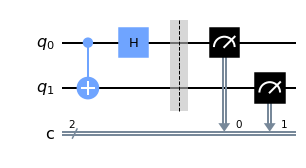

In [10]:
circuit = QuantumCircuit(2,2)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw('mpl');

#### Teleportation

_Situation:_ 

A(lice) wants to send her _unkown_ state $\ket{\phi}_S := \alpha\ket{0}_S + \beta\ket{1}_S$ to B(ob).
The problem is, she can only send him two classical bits. Both A and B share the maximal entangled state $\ket{\psi^{00}}_{AB}$

The initial state of the total system is as follows:

$$
\ket{\phi}_S \otimes \ket{\psi^{00}}_{AB} = \frac{1}{\sqrt{2}}\left(\alpha\ket{000}_{SAB} + \alpha\ket{011}_{SAB} + \beta\ket{100}_{SAB}+\beta\ket{111}_{SAB}\right) \\
= \frac{1}{2\sqrt{2}}
    \left[
        \left(\ket{00}_{SA}+\ket{11}_{SA}\right)\otimes\left(\alpha\ket{0}_{B}+\beta\ket{1}_{B}\right) + \\
        \left(\ket{01}_{SA}+\ket{10}_{SA}\right)\otimes\left(\alpha\ket{1}_{B}+\beta\ket{0}_{B}\right) + \\
        \left(\ket{00}_{SA}-\ket{11}_{SA}\right)\otimes\left(\alpha\ket{0}_{B}-\beta\ket{1}_{B}\right) + \\
        \left(\ket{01}_{SA}-\ket{10}_{SA}\right)\otimes\left(\alpha\ket{1}_{B}-\beta\ket{0}_{B}\right)
    \right] \\
= \frac{1}{2}
    \left[
        \ket{\psi^{00}}_{SA}\otimes\ket{\phi}_B + 
        \ket{\psi^{01}}_{SA}\otimes\left(\sigma_X\ket{\phi}_B\right) + 
        \ket{\psi^{10}}_{SA}\otimes\left(\sigma_Z\ket{\phi}_B\right) + 
        \ket{\psi^{11}}_{SA}\otimes\left(\sigma_X\sigma_Z\ket{\phi}_B\right) 
    \right]
$$

This means that the execution happens as follows. A measures $\ket{\psi^{ij}}$ and as shown before, this measurment collapses into a certain state for A and B

$$
\ket{\psi^{00}} \rightarrow \ket{\phi}_B\\
\ket{\psi^{01}} \rightarrow \sigma_X\ket{\phi}_B\\
\ket{\psi^{10}} \rightarrow \sigma_Z\ket{\phi}_B\\
\ket{\psi^{11}} \rightarrow \sigma_X\sigma_Z\ket{\phi}_B\\
$$

Now, lets show how A can tell B using 2 classical bits, what the state is:

$$
\ket{\psi^{00}} \otimes \ket{\phi}_B \rightarrow \text{A sends}\  0 0 \rightarrow \text{B applies}\ I \rightarrow \ket{\phi}_B \\
\ket{\psi^{01}} \otimes \sigma_X\ket{\phi}_B \rightarrow \text{A sends}\  0 1 \rightarrow \text{B applies}\ \sigma_X \rightarrow \ket{\phi}_B \\
\ket{\psi^{10}} \otimes \sigma_Z\ket{\phi}_B \rightarrow \text{A sends}\  1 0 \rightarrow \text{B applies}\ \sigma_Z \rightarrow \ket{\phi}_B \\
\ket{\psi^{11}} \otimes \sigma_X\sigma_Z\ket{\phi}_B \rightarrow \text{A sends}\  1 1 \rightarrow \text{B applies}\ \sigma_X\sigma_Z \rightarrow \ket{\phi}_B \\
$$


_**Remark**_

Due to the _no cloning theorem_, As state collapses during the measurment, so she loses the initial state $\ket{\phi}$. She cannot copy her state, only send it to B when destroying her own.